# Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from life_saving_tools.maths.ode import ODE


# First Order ODE


## ODE #1


Let's solve the simple ODE:

$$
\frac{dy}{dt} = yt
$$

subjected to:

$$
y(0) = 1
$$

Analytically, the solution is:

$$
y = e^{\frac{t^2}{2}}
$$


In [12]:
f = lambda t, y: t * y
F = lambda t: np.exp((t ** 2) / 2)


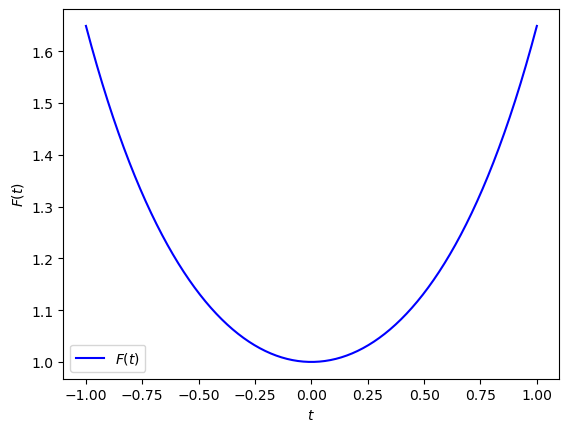

In [13]:
ts = np.linspace(-1, 1, 250)
ys = F(ts)
plt.rcdefaults()
plt.plot(ts, ys, "b-", label="$F(t)$")
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.legend(loc="best")


In [28]:
def compare(pts, title=""):
    plt.plot(ts, ys, "b-", label="Original", lw=2)
    plt.scatter(ts, pts, label="Calculated", color="red", s=10)
    plt.xlabel("$t$")
    plt.ylabel("$F(t)$")
    plt.title(title.title())
    plt.legend(loc="best")


### Using Euler Method


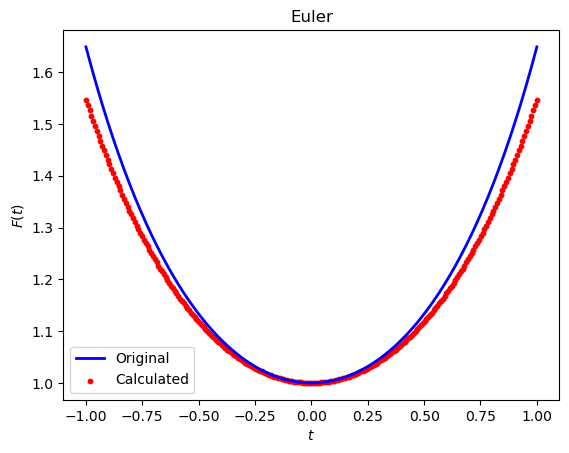

In [31]:
ode_solver = ODE()
yte = ode_solver.solve(f, 0, 1, ts, 10, method="euler")
compare(yte, "Euler")


### Using RK Methods


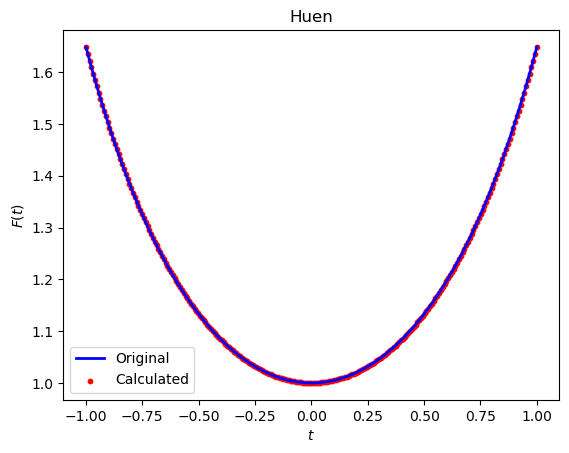

In [38]:
ytrk2 = ode_solver.solve(f, 0, 1, ts, 10, method="heun")
compare(ytrk2, "huen")


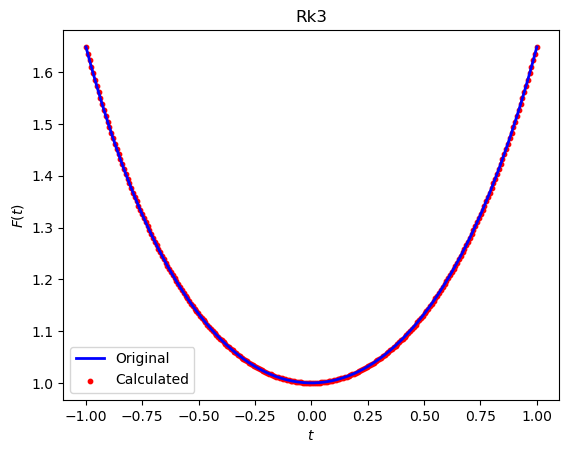

In [33]:
ytrk3 = ode_solver.solve(f, 0, 1, ts, 10, method="rk3")
compare(ytrk3, "rk3")


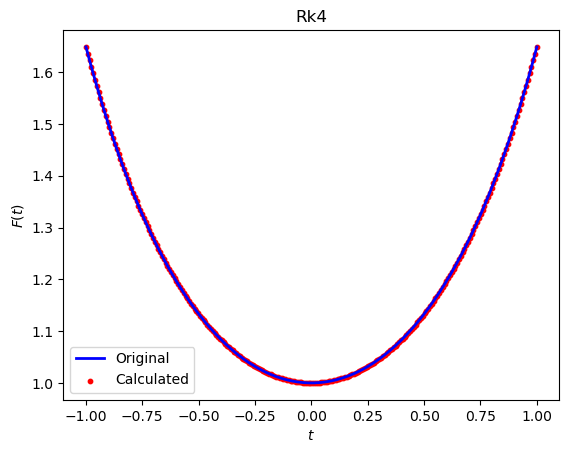

In [34]:
ytrk4 = ode_solver.solve(f, 0, 1, ts, 10, method="rk4")
compare(ytrk4, "rk4")


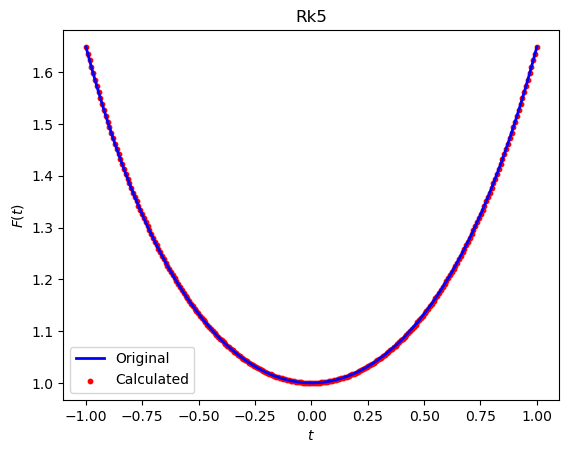

In [35]:
ytrk5 = ode_solver.solve(f, 0, 1, ts, 10, method="rk5")
compare(ytrk5, "rk5")


#### Finite Difference


Using the finite difference method, we can approximate the solution to the ODE:

$$
y_{n+1} = y_n(1+ht_n)
$$


In [81]:
def finite_diff(f, x0, y0, x, n=100):
    h = (x - x0) / n
    y_prev = y0
    for i in range(n):
        y_prev = f(x0 + i * h, y_prev, h2=h)
    return y_prev


In [84]:
f = lambda x, y, h2: y * (1 + h2 * x)


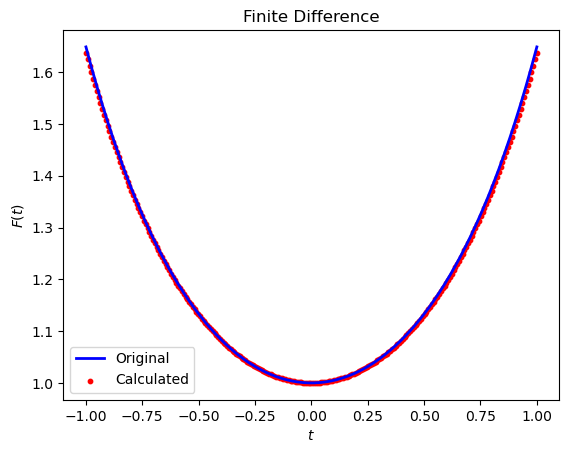

In [85]:
yfd = finite_diff(f, 0, 1, ts, n=100)
compare(yfd, "Finite Difference")


## Higher Order


### Using the Usual Methods


#### Example 1


The ODE governing the motion of a particle in a harmonic oscillator is given by

$$
\frac{d^2x}{dt^2} = -\omega^2 x
$$

With initial conditions $x(0) = 0$ and $\dot{x}(0) = 0$.


To solve this, we define two varibales, $u_1 = x$ and $u_2 = \dot{x}$. Using this, we get:

$$
\dot{u_2} = -\omega^2 x\\
\dot{u_1} = u_2 \\
$$

The sysytem of equations can be written as:

$$
\frac{d}{dt}
\begin{pmatrix}
{u_1} \\
{u_2}
\end{pmatrix} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}
$$

This can be rewritten as:

$$
\frac{du}{dt} = f{(x, u)}\\
\text{ where }\\
f{(x, u)} = \begin{pmatrix}
 u_2\\
-\omega^2 x
\end{pmatrix}\\
u = \begin{pmatrix}
u_1\\
u_2
\end{pmatrix}
$$


The initial conditions are:

$$
t_0 = \begin{pmatrix}
0\\
0
\end{pmatrix}\\
x_0 = \begin{pmatrix}
1\\
0
\end{pmatrix}\\
$$


Now, the equations are in a form which can be solved by the Runge-Kutta method.


In [ ]:
def rk4_general(F, x, x0, y0, n=100):
    h = (x - x0) / n
    y_prev = y0
    for i in range(n):
        k1 = F(x0 + i * h, y_prev)
        k2 = F(x0 + (i + 0.5) * h, y_prev + h * k1 * 0.5)
        k3 = F(x0 + (i + 0.5) * h, y_prev + h * k2 * 0.5)
        k4 = F(x0 + (i + 1) * h, y_prev + h * k3)
        y_prev = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return y_prev


In [ ]:
omega = 2 * np.pi
f1 = lambda x, u1, u2: u2
f2 = lambda x, u1, u2: -(omega ** 2) * u1


def F(x, Y):
    sol = [f1(x, Y[0], Y[1]), f2(x, Y[0], Y[1])]
    return np.array(sol)


xs = np.linspace(-3, 3, 300)
ys = np.zeros((2, 300))
y0 = np.array([1, 0])
x0 = np.array([0, 0])
for i in range(300):
    ys[:, i] = rk4_general(F, xs[i], x0, y0)


In [ ]:
plt.rcdefaults()


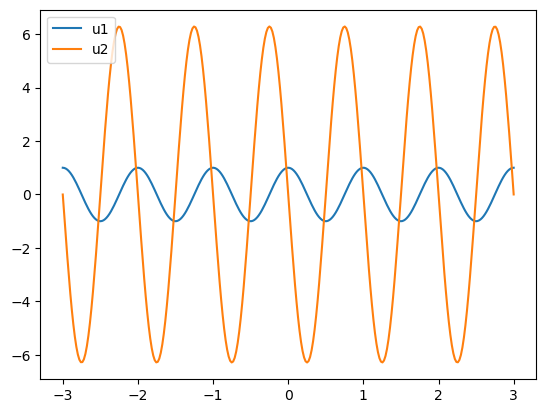

In [ ]:
plt.plot(xs, ys[0], label="u1")
plt.plot(xs, ys[1], label="u2")
plt.legend()


#### Example 2


Let's solve the ODE

$$
\frac{d^2y}{dx^2} + \frac{dy}{dx} -6y = 0
$$

defining $u_1 = y$ and $u_2 = \frac{dy}{dx}$ gives:

$$
\left\{\begin{array}{l}
  \frac{du_1}{dx} = u_2 \\
  \frac{du_2}{dx} = 6u_1 - u_2
\end{array}\right.
$$

The solution of this can be done as:


In [2]:
f2 = lambda x, u1, u2: 6 * u1 - u2
f1 = lambda x, u1, u2: u2


def F(x, Y):
    sol = [f1(x, Y[0], Y[1]), f2(x, Y[0], Y[1])]
    return np.array(sol)


In [3]:
y0 = np.array([3, 1])
x0 = np.array([0, 0])


In [7]:
def rk4_general(F, x, x0, y0, n):
    h = (x - x0) / n
    print(h)
    y_prev = y0
    for i in range(n):
        k1 = F(x0 + i * h, y_prev)
        k2 = F(x0 + (i + 0.5) * h, y_prev + h * k1 * 0.5)
        k3 = F(x0 + (i + 0.5) * h, y_prev + h * k2 * 0.5)
        k4 = F(x0 + (i + 1) * h, y_prev + h * k3)
        y_prev = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return y_prev


In [8]:
x = 1
n = 10
rk4_general(F, x, x0, y0, n)


[0.1 0.1]


array([14.82757851, 29.40615689])

In [ ]:
xs = np.linspace(0, 1, 100)
ys = np.zeros((2, 100))
for i in range(100):
    ys[:, i] = rk4_general(F, xs[i], x0, y0, n)


In [ ]:
plt.rcdefaults()


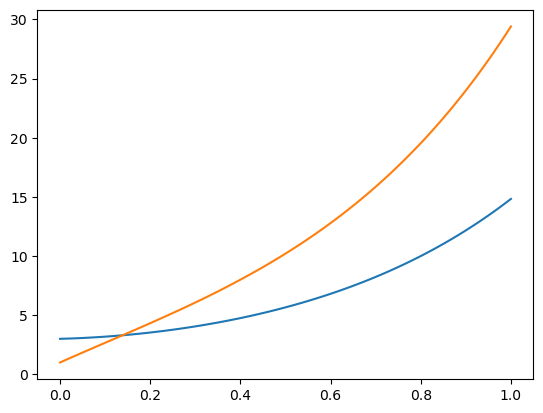

In [ ]:
plt.plot(xs, ys[0], label="u1")
plt.plot(xs, ys[1], label="u2")


#### Example 3


We'll be solving:

$$
y'''-6y''+11y'-6y = 0
$$

with initial conditions:

$$
y(0) = 1\\
y'(0) = 2\\
y''(0) = 3
$$

The exact solution is:

$$
y = -0.5 e^x + 2e^{2x}-0.5 e^{3x}
$$


In [ ]:
def rk4_general(funcs, x, x0, y0, n):
    h = (x - x0) / n
    y_prev = y0
    for i in range(n):
        k1 = F(x0 + i * h, y_prev)
        k2 = F(x0 + (i + 0.5) * h, y_prev + h * k1 * 0.5)
        k3 = F(x0 + (i + 0.5) * h, y_prev + h * k2 * 0.5)
        k4 = F(x0 + (i + 1) * h, y_prev + h * k3)
        y_prev = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return y_prev


In [133]:
f = lambda x: -0.5 * np.exp(x) + 2 * np.exp(2 * x) - 0.5 * np.exp(3 * x)


In [14]:
f3 = lambda x, u1, u2, u3: 6 * u3 - 11 * u2 + 6 * u1
f2 = lambda x, u1, u2, u3: u3
f1 = lambda x, u1, u2, u3: u2

funcs = [f1, f2, f3]


def F(funcs, x, Y):
    x = x[0]
    sol = [f(x, *Y) for f in funcs]
    return np.array(sol)


F(funcs, x, y0)


array([2, 3, 2])

In [12]:
def rk4_general(funcs, x, x0, y0, n=20):
    h = (x - x0) / n
    y_prev = y0

    def F(funcs, x, Y):
        x = x[0]
        sol = [f(x, *Y) for f in funcs]
        return np.array(sol)

    for i in range(n):
        k1 = F(funcs, x0 + i * h, y_prev)
        k2 = F(funcs, x0 + (i + 0.5) * h, y_prev + h * k1 * 0.5)
        k3 = F(funcs, x0 + (i + 0.5) * h, y_prev + h * k2 * 0.5)
        k4 = F(funcs, x0 + (i + 1) * h, y_prev + h * k3)
        y_prev = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) * h / 6
    return y_prev


In [15]:
import numpy as np

y0 = np.array([1, 2, 3])
x0 = np.array([0, 0, 0])
x = np.array([1.4])
# ys = np.zeros((len(funcs), len(x)))
rk4_general(funcs, x, x0, y0)


array([  -2.47982779,  -36.27331561, -170.54281023])

In [160]:
y0 = np.array([1, 2, 3])
x0 = np.array([0, 0, 0])
n = 20
xs = np.linspace(0, 1, 100)
ys = np.zeros((3, 100))
ys = rk4_general(F, xs, x0, y0, n)


ValueError: operands could not be broadcast together with shapes (100,) (3,) 

In [155]:
y0 = np.array([1, 2, 3])
x0 = np.array([0, 0, 0])
n = 20
xs = np.linspace(0, 1, 100)
ys = np.zeros((3, 100))
for i in range(100):
    ys[:, i] = rk4_general(F, xs[i], x0, y0, n)


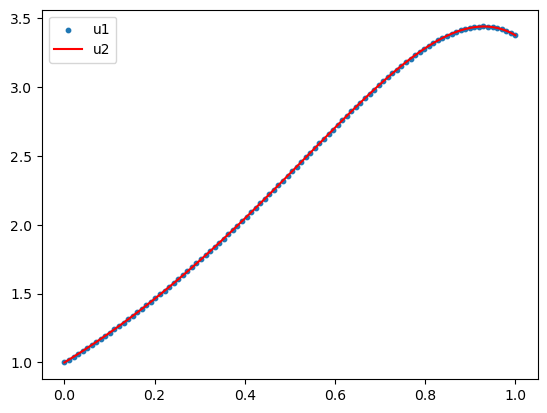

In [156]:
plt.scatter(xs, ys[0], label="u1", s=10)
plt.plot(xs, f(xs), "r", label="u2")
plt.legend()
